# Opis i razumevanje podataka

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('kredit.csv')

In [2]:
data.columns
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
data.shape

(150000, 11)

In [6]:
data.isnull().values.any() #ima nedostajucih vrednosti

True

In [7]:
data.info() #vidimo da ima nedostajucih vrednosti u kolonama MonthlyIncome i NumberOfDependents

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [8]:
data = data.fillna(0) #popunjavamo nedostajuce vrednosti

In [9]:
data.isnull().values.any() #nema vise nedostajucih vrednosti

False

In [10]:
data['SeriousDlqin2yrs'] = data['SeriousDlqin2yrs'].astype('category',copy=False) #prebacivanje target varijable u kategoricku

In [11]:
data['NumberOfDependents']=data['NumberOfDependents'].astype('int64') # prebacujemo i float varijablu u int

In [12]:
data.shape

(150000, 11)

In [13]:
data['SeriousDlqin2yrs'].value_counts() #vidimo da postoji veliki disbalans klasa, jer ima mnogo vise onih koji nisu kasnili sa placanjem

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [14]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt

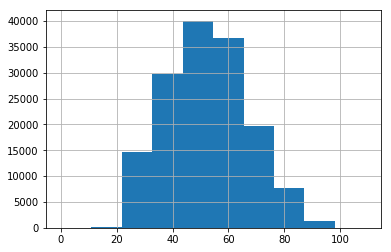

In [15]:
data['age'].hist() #vidimo da postoji problem u raspodeli kod atributa age

In [16]:
data = data[data['age']>18] #izbacujemo opservacije gde ljudi imaju manje od 18 godina (verovatno su autlejeri)

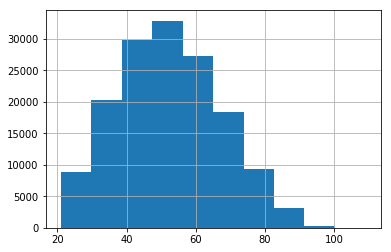

In [17]:
data['age'].hist() #najveci broj ispitanika ima izmedju 40 i 60 godina


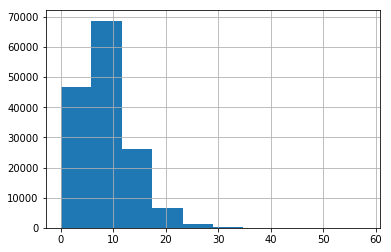

In [18]:
data['NumberOfOpenCreditLinesAndLoans'].hist() #najveci broj lica ima izmedju 5 i 10 kredita

Text(0,0.5,'Number of 90 days late')

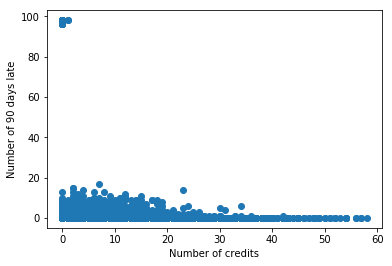

In [19]:
plt.scatter(data['NumberOfOpenCreditLinesAndLoans'], data['NumberOfTimes90DaysLate'])
plt.xlabel('Number of credits')
plt.ylabel('Number of 90 days late') #ovi sto na pocetku uzmu vise kredita teze vracaju

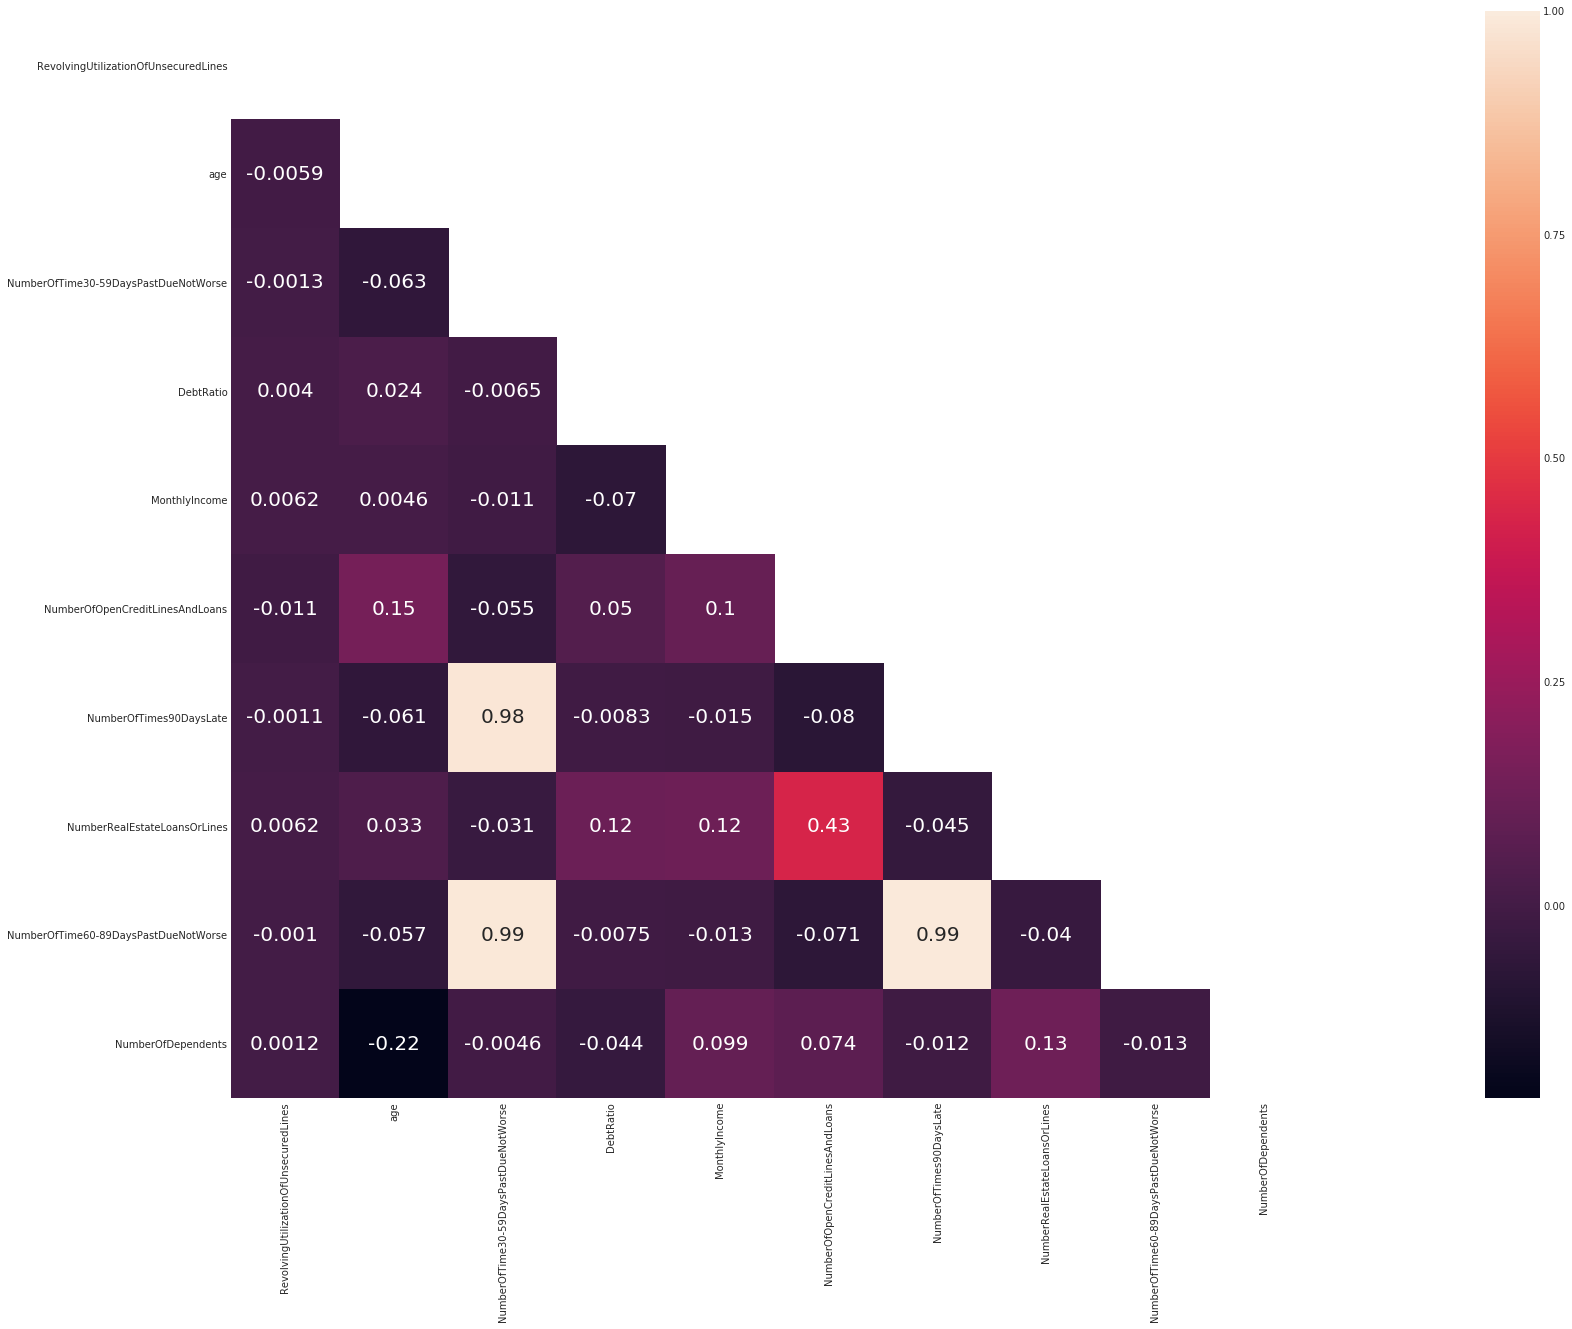

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 60, 20
import seaborn as sns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # uzimamo samo numericke varijable
numeric_data = data.select_dtypes(include=numerics) # pravimo dataset samo sa numerickim varijablama

corr_matrix = numeric_data.corr() # pravimo korelacionu matricu

#sns.heatmap(corr_matrix) # pomocu heatmapa prikazujemo korelacije
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_matrix, mask=mask, square=True,annot=True, fmt=".2g",annot_kws={"size": 20})

In [21]:
data['NumberOfTime30-59DaysPastDueNotWorse'].corr(data['NumberOfTime60-89DaysPastDueNotWorse']) # vidimo jaku korelaciju 
# izmedju atributa NumberOfTime30-59DaysPastDueNotWorse i NumberOfTime60-89DaysPastDueNotWorse

0.98700557448417303

In [22]:
data['NumberOfTime30-59DaysPastDueNotWorse'].corr(data['NumberOfTimes90DaysLate']) # kao i ovih atributa, mozemo utvrditi 
# jaku korelaciju koja je pozitivna

0.98360281587070175

In [23]:
data['NumberOfTime60-89DaysPastDueNotWorse'].corr(data['NumberOfTimes90DaysLate'])

0.99279618253116186

In [24]:
data['NumberRealEstateLoansOrLines'].corr(data['NumberOfOpenCreditLinesAndLoans']) #  ove korelacije ce biti kasnije bitne
# u odredjivanju izlazne varijable

0.43396278538868904

# Priprema podataka

In [25]:
data.shape
data['MonthlyOutcome']= data['MonthlyIncome'] * data['DebtRatio'] # pravimo novu varijablu - Rashodi

In [26]:
data=data[['age', 'NumberOfDependents','RevolvingUtilizationOfUnsecuredLines','MonthlyIncome','MonthlyOutcome','DebtRatio','NumberOfOpenCreditLinesAndLoans',
            'NumberRealEstateLoansOrLines','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse',
           'NumberOfTimes90DaysLate','SeriousDlqin2yrs']] # Sortiranje kolona

In [27]:
mask = data.MonthlyOutcome == 0.000000
column_name = 'MonthlyOutcome'
data.loc[mask, column_name] = data.DebtRatio
data

,age,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,MonthlyOutcome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,SeriousDlqin2yrs
0,45,2,0.766127,9120.0,7323.197016,0.802982,13,6,2,0,0,1
1,40,1,0.957151,2600.0,316.878123,0.121876,4,0,0,0,0,0
2,38,0,0.658180,3042.0,258.914887,0.085113,2,0,1,0,1,0
3,30,0,0.233810,3300.0,118.963951,0.036050,5,0,0,0,0,0
4,49,0,0.907239,63588.0,1584.975094,0.024926,7,1,1,0,0,0
5,74,1,0.213179,3500.0,1314.624392,0.375607,3,1,0,0,0,0
6,57,0,0.305682,0.0,5710.000000,5710.000000,8,3,0,0,0,0
7,39,0,0.754464,3500.0,734.790059,0.209940,8,0,0,0,0,0
8,27,0,0.116951,0.0,46.000000,46.000000,2,0,0,0,0,0
9,57,2,0.189169,23684.0,14359.393699,0.606291,9,4,0,0,0,0


In [28]:
data['LinesLoans']=data['NumberRealEstateLoansOrLines']+data['NumberOfOpenCreditLinesAndLoans'] # Zbir linija kredita i pozajmica

In [29]:
data['WithDependents'] = data['NumberOfDependents']
data.loc[(data['WithDependents'] >= 1), 'WithDependents'] = 1

In [30]:
data=data[['age', 'NumberOfDependents','WithDependents','RevolvingUtilizationOfUnsecuredLines','MonthlyIncome','MonthlyOutcome','DebtRatio','NumberOfOpenCreditLinesAndLoans',
            'NumberRealEstateLoansOrLines','LinesLoans','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse',
           'NumberOfTimes90DaysLate','SeriousDlqin2yrs']] # Sortiranje kolona

In [31]:
data['age_category'] = data['age']
data.loc[(data['age'] >= 18) & (data['age'] < 60), 'age_category'] = 0
data.loc[(data['age'] >= 60), 'age_category'] = 1

C:\Users\Marija.Miljkovic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Marija.Miljkovic\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
data['age_category'] = data['age_category'].replace(0, "working")
data['age_category'] = data['age_category'].replace(1, "senior")
# menjamo brojeve u kategoricke varijable - dummy variable

C:\Users\Marija.Miljkovic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Marija.Miljkovic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
data=data[['age','age_category', 'NumberOfDependents','WithDependents','RevolvingUtilizationOfUnsecuredLines','MonthlyIncome','MonthlyOutcome','DebtRatio','NumberOfOpenCreditLinesAndLoans',
            'NumberRealEstateLoansOrLines','LinesLoans','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse',
           'NumberOfTimes90DaysLate','SeriousDlqin2yrs']] # Sortiranje kolona

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149999
Data columns (total 15 columns):
age                                     149999 non-null int64
age_category                            149999 non-null object
NumberOfDependents                      149999 non-null int64
WithDependents                          149999 non-null int64
RevolvingUtilizationOfUnsecuredLines    149999 non-null float64
MonthlyIncome                           149999 non-null float64
MonthlyOutcome                          149999 non-null float64
DebtRatio                               149999 non-null float64
NumberOfOpenCreditLinesAndLoans         149999 non-null int64
NumberRealEstateLoansOrLines            149999 non-null int64
LinesLoans                              149999 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149999 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149999 non-null int64
NumberOfTimes90DaysLate                 149999 non-null int64
SeriousDlqin

In [35]:
data['age_category'] = data['age_category'].astype('category',copy=False) #prebacivanje age_category varijable u kategoricku

In [36]:
data['NumOfPastDue'] = data['NumberOfTimes90DaysLate']+data['NumberOfTime60-89DaysPastDueNotWorse'] +data['NumberOfTime30-59DaysPastDueNotWorse']

In [37]:
data['MonthlyBalance'] = data['MonthlyIncome']-data['MonthlyOutcome']

In [38]:
data=data[['age','age_category', 'NumberOfDependents','WithDependents','RevolvingUtilizationOfUnsecuredLines','MonthlyIncome','MonthlyOutcome','DebtRatio','MonthlyBalance','NumberOfOpenCreditLinesAndLoans',
            'NumberRealEstateLoansOrLines','LinesLoans','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse',
           'NumberOfTimes90DaysLate','NumOfPastDue','SeriousDlqin2yrs']] # Sortiranje kolona

In [39]:
data.head()

,age,age_category,NumberOfDependents,WithDependents,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,MonthlyOutcome,DebtRatio,MonthlyBalance,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,LinesLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumOfPastDue,SeriousDlqin2yrs
0,45,working,2,1,0.766127,9120.0,7323.197016,0.802982,1796.802984,13,6,19,2,0,0,2,1
1,40,working,1,1,0.957151,2600.0,316.878123,0.121876,2283.121877,4,0,4,0,0,0,0,0
2,38,working,0,0,0.658180,3042.0,258.914887,0.085113,2783.085113,2,0,2,1,0,1,2,0
3,30,working,0,0,0.233810,3300.0,118.963951,0.036050,3181.036049,5,0,5,0,0,0,0,0
4,49,working,0,0,0.907239,63588.0,1584.975094,0.024926,62003.024906,7,1,8,1,0,0,1,0


In [40]:
# ubacujemo sve varijable za sada
X=data.select_dtypes(include=['int64', 'float64'])
y=data['SeriousDlqin2yrs']

1: 10026 6.684044560297068%
0: 139973 93.31595543970293%


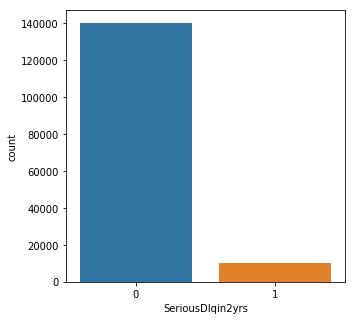

In [41]:
rcParams['figure.figsize'] = 5,5 # graficki predstavljen disbalans klasa

n=len(y)
for value in y.unique():
    count=len(y[y==value])
    percentage = count/n*100
    print(str(value)+': ' + str (count) + ' '+str(percentage)+'%') # prikaz disbalansa klasa
    sns.countplot(y)

# Treniranje više algoritama i interpretacija dobijenih rezultata

In [42]:
# Uvoz biblioteka za modelovanje i evaluaciju (tačnost klasifikacije)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [43]:
# Podela skupa podataka na trening i test jer imamo dovoljno podataka
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## Logistička regresija

In [44]:
lr_model = LogisticRegression().fit(X_train, y_train)
predictions = lr_model.predict(X_test)
print('Tacnost klasifikacije: ' + str(accuracy_score(predictions, y_test))) # proba LR tacnost

Tacnost klasifikacije: 0.933813333333


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np
import itertools

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = title+' (Normalized)'

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
# Računanje matrice konfuzije
conf=confusion_matrix(y_test, predictions)
conf # prikaz matrice procene u originalnom obliku

# Matrica konfuzije po redovima prikazuje tačne vrednosti, a po kolonama predviđene

array([[34932,    61],
       [ 2421,    86]], dtype=int64)

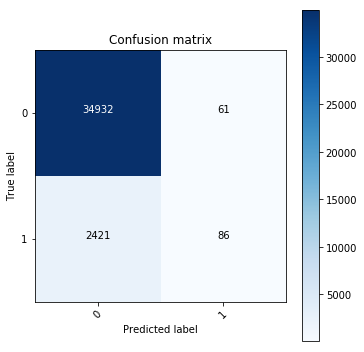

In [48]:
# Radi jednostavnije analize matrice koristimo pomoćnu metodu za vizualizaciju
cls=y_train.unique() # uzimamo jedinstvene vrednosti
plot_confusion_matrix(conf, cls, normalize = False)

In [49]:
# Tacnost, Preciznost i Odziv inicijalnog modela
print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, predictions)))
print('Preciznost: ' +str(precision_score(y_test, predictions)))
print('Odziv: ' + str(recall_score(y_test, predictions)))

#Na osnovu rezultata inicijalnog modela mozemo primetiti da iako je tacno relativno viskoka (>93%) 
#model ne predviđa dobro "pozitivnu" tj. manjinsku klasu. Mera "Odziv" nam otkriva ovu činjenicu: 
#manje od 1% pozitivne klase je identifikovano. Mera "Preciznost" nam govori u ovom slulaju da je od 
#svih predviđenih pozitivnih slučajeva, oko 54% je bilo tačno predviđeno.

Tacnost klasifikacije: 0.933813333333
Preciznost: 0.585034013605
Odziv: 0.034303948943


## Drvo odlučivanja

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
tree = DecisionTreeClassifier(max_depth=5, random_state=2018)

tree.fit(X_train, y_train)

tree_pred = tree.predict(X_test)

print('Drvo odlucivanja')
print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, tree_pred)))
print('Preciznost: ' +str(precision_score(y_test, tree_pred)))
print('Odziv: ' + str(recall_score(y_test, tree_pred)))


Drvo odlucivanja
Tacnost klasifikacije: 0.9364
Preciznost: 0.581989247312
Odziv: 0.172716394097
KNN
Tacnost klasifikacije: 0.933546666667
Preciznost: 0.727272727273
Odziv: 0.00957319505385


In [52]:
# Računanje matrice konfuzije za Drvo odlucivanja
conf_tree=confusion_matrix(y_test, tree_pred)
conf_tree # prikaz matrice procene u originalnom obliku

# Matrica konfuzije po redovima prikazuje tačne vrednosti, a po kolonama predviđene

array([[34682,   311],
       [ 2074,   433]], dtype=int64)

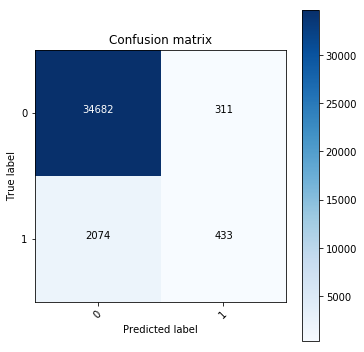

In [53]:
# Radi jednostavnije analize matrice koristimo pomoćnu metodu za vizualizaciju
cls=y_train.unique() # uzimamo jedinstvene vrednosti
plot_confusion_matrix(conf_tree, cls, normalize = False)

## Random forest

In [56]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf_model= RandomForestClassifier(n_estimators=500)

rf_model.fit(X_train, y_train)

rf_pred= rf_model.predict(X_test)
print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, rf_pred)))
print('Preciznost: ' +str(precision_score(y_test, rf_pred)))
print('Odziv: ' + str(recall_score(y_test, rf_pred)))

Tacnost klasifikacije: 0.93648
Preciznost: 0.572087658593
Odziv: 0.197846031113


In [57]:
# Računanje matrice konfuzije za RF
conf_rf=confusion_matrix(y_test,rf_pred)
conf_rf # prikaz matrice procene u originalnom obliku

# Matrica konfuzije po redovima prikazuje tačne vrednosti, a po kolonama predviđene

array([[34622,   371],
       [ 2011,   496]], dtype=int64)

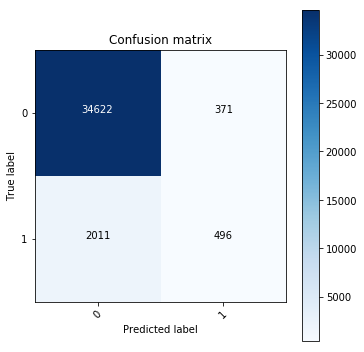

In [58]:
# Radi jednostavnije analize matrice koristimo pomoćnu metodu za vizualizaciju
cls=y_train.unique() # uzimamo jedinstvene vrednosti
plot_confusion_matrix(conf_rf, cls, normalize = False)

## GBT

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=  GradientBoostingClassifier()

gb_model.fit(X_train, y_train)

gb_pred= gb_model.predict(X_test)
print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, gb_pred)))
print('Preciznost: ' +str(precision_score(y_test, gb_pred)))
print('Odziv: ' + str(recall_score(y_test, gb_pred)))

Tacnost klasifikacije: 0.936933333333
Preciznost: 0.581235697941
Odziv: 0.20263262864


In [60]:
# Računanje matrice konfuzije za RF
conf_gb=confusion_matrix(y_test,gb_pred)
conf_gb # prikaz matrice procene u originalnom obliku

# Matrica konfuzije po redovima prikazuje tačne vrednosti, a po kolonama predviđene

array([[34627,   366],
       [ 1999,   508]], dtype=int64)

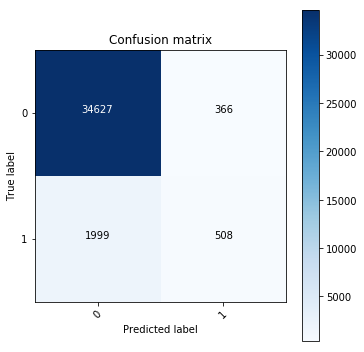

In [61]:
# Radi jednostavnije analize matrice koristimo pomoćnu metodu za vizualizaciju
cls=y_train.unique() # uzimamo jedinstvene vrednosti
plot_confusion_matrix(conf_gb, cls, normalize = False)

# Selekcija atributa i interpretacija dobijenih rezultata

In [62]:
data.columns

Index(['age', 'age_category', 'NumberOfDependents', 'WithDependents',
       'RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome',
       'MonthlyOutcome', 'DebtRatio', 'MonthlyBalance',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'LinesLoans', 'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumOfPastDue', 'SeriousDlqin2yrs'],
      dtype='object')

In [63]:
novi = data.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfDependents'],axis=1) 
# zbog velike korelacije izmedju ovih varijabli, izbacicemo ih jer smo napravili jednu od njih 

In [64]:
novi.columns

Index(['age', 'age_category', 'WithDependents',
       'RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome',
       'MonthlyOutcome', 'DebtRatio', 'MonthlyBalance',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'LinesLoans', 'NumOfPastDue', 'SeriousDlqin2yrs'],
      dtype='object')

In [65]:
novi= novi.drop(['age_category'],axis=1) # age_category kategoricka varijabla, ne treba nam za algoritme koji koriste numericke podatke

In [66]:
X=novi.select_dtypes(include=['int64', 'float64'])
y=novi['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# pravimo novi test & train set jer smo izbacili neke varijable

In [67]:
X.columns

Index(['age', 'WithDependents', 'RevolvingUtilizationOfUnsecuredLines',
       'MonthlyIncome', 'MonthlyOutcome', 'DebtRatio', 'MonthlyBalance',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'LinesLoans', 'NumOfPastDue'],
      dtype='object')

## Lasso Regularization

In [141]:
# Koriscenjem Lasso Regularizacije izvrsicemo feature selection za LR

from sklearn.preprocessing import MinMaxScaler
RandomState = 42

def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks))

names = X.columns
ranks = {}
# pomocna funkcija za analizu Lasoo za LR

In [142]:
from sklearn.preprocessing import StandardScaler # Lasso za LR l1 penal

scaler = StandardScaler() # transformisanje podataka za LR fitting
std_data = scaler.fit_transform(X_train.values)

model_LogRegLASSO = LogisticRegression(penalty='l1', C=0.1, random_state=42, solver='liblinear', n_jobs=1) # uspostavljanje modela
model_LogRegLASSO.fit(std_data, y_train)

ranks["LogRegLASSO"] = rank_to_dict(list(map(float, model_LogRegLASSO.coef_.reshape(len(names), -1))), names, order=1)
print(ranks["LogRegLASSO"])

{'age': 0.0, 'WithDependents': 1.0, 'RevolvingUtilizationOfUnsecuredLines': 0.73999999999999999, 'MonthlyIncome': 0.51000000000000001, 'MonthlyOutcome': 0.75, 'DebtRatio': 0.48999999999999999, 'MonthlyBalance': 0.38, 'NumberOfOpenCreditLinesAndLoans': 0.68999999999999995, 'NumberRealEstateLoansOrLines': 0.82999999999999996, 'LinesLoans': 0.75, 'NumOfPastDue': 0.98999999999999999}


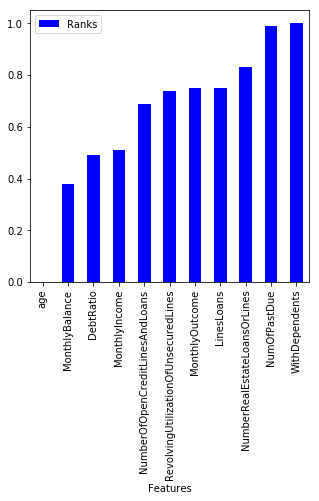

In [143]:
import operator
listsLASSO = sorted(ranks["LogRegLASSO"].items(), key=operator.itemgetter(1)) # plotujemo 
# convert list>array>dataframe
dfLASSO = pd.DataFrame(np.array(listsLASSO).reshape(len(listsLASSO), 2),
                       columns=['Features', 'Ranks']).sort_values('Ranks')
dfLASSO['Ranks'] = dfLASSO['Ranks'].astype(float)

dfLASSO.plot.bar(x='Features', y='Ranks', color='blue')
plt.xticks(rotation=90)
plt.show()

In [71]:
# vidimo da su najbitniji atributi 'WithDependents' & 'NumOfPastDue' izvedene varijable iz ostalih

In [136]:
X=novi.select_dtypes(include=['int64', 'float64'])
y=novi['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## SelectFromModel

In [137]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score


pipe1 = Pipeline([('feature_selection', SelectFromModel(estimator=GradientBoostingClassifier())),
                   ('classification', RandomForestClassifier())])

pipe2 = Pipeline([('feature_selection', SelectFromModel(estimator=GradientBoostingClassifier())),
                   ('classification', DecisionTreeClassifier())])


print("RF: ", cross_val_score(pipe1, X,y, scoring='recall').mean())
print("DT: ", cross_val_score(pipe2, X,y, scoring='recall').mean())

RF:  0.183323359266
DT:  0.234191103132


In [138]:
selection1=SelectFromModel(GradientBoostingClassifier()) 
fitted_selection1=selection.fit(X,y)
shape1 = fitted_selection1.transform(X).shape #biraju se 3 najbitnija atributa za pokretanje RandomForest algoritma

selection2=SelectFromModel(DecisionTreeClassifier()) 
fitted_selection2=selection.fit(X,y)
shape2 = fitted_selection2.transform(X).shape #biraju se 3 najbitnija atributa za pokretanje RandomForest algoritma

print("RF: ",shape1)
print("DT: ",shape2)

RF:  (149999, 3)
DT:  (149999, 3)


In [140]:
X.columns

Index(['age', 'WithDependents', 'RevolvingUtilizationOfUnsecuredLines',
       'MonthlyIncome', 'MonthlyOutcome', 'DebtRatio', 'MonthlyBalance',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'LinesLoans', 'NumOfPastDue'],
      dtype='object')

In [139]:
fitted_selection1.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False,  True], dtype=bool)

In [83]:
# napravicemo novi df samo sa "bitnijim varijablama"

In [84]:
bitne = novi.drop(['age','NumberRealEstateLoansOrLines','NumberOfOpenCreditLinesAndLoans','DebtRatio','MonthlyBalance'],axis=1)

In [146]:
bitne.columns

Index(['WithDependents', 'RevolvingUtilizationOfUnsecuredLines',
       'MonthlyIncome', 'MonthlyOutcome', 'LinesLoans', 'NumOfPastDue',
       'SeriousDlqin2yrs'],
      dtype='object')

In [148]:
top3 = bitne[['WithDependents', 'RevolvingUtilizationOfUnsecuredLines', 'NumOfPastDue','SeriousDlqin2yrs']];

In [152]:
X=top3.select_dtypes(include=['int64', 'float64'])
y=top3['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# pravimo novi test & train set jer smo izbacili neke varijable

In [157]:
X_test.columns

Index(['WithDependents', 'RevolvingUtilizationOfUnsecuredLines',
       'NumOfPastDue'],
      dtype='object')

## Pokretanje algoritama sa najbitnijim varijablama

### Logisticka regresija

In [154]:
lr_model = LogisticRegression().fit(X_train, y_train)
predictions = lr_model.predict(X_test)

print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, predictions)))
print('Preciznost: ' +str(precision_score(y_test, predictions)))
print('Odziv: ' + str(recall_score(y_test, predictions)))

Tacnost klasifikacije: 0.933466666667
Preciznost: 0.590909090909
Odziv: 0.0155564419625


### Drvo odlučivanja

In [155]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
print('Drvo odlucivanja')
print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, tree_pred)))
print('Preciznost: ' +str(precision_score(y_test, tree_pred)))
print('Odziv: ' + str(recall_score(y_test, tree_pred)))

Drvo odlucivanja
Tacnost klasifikacije: 0.93592
Preciznost: 0.598113207547
Odziv: 0.126445951336


### Šuma stabala

In [156]:
rf_model= RandomForestClassifier(n_estimators=500)

rf_model.fit(X_train, y_train)

rf_pred= rf_model.predict(X_test)
print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, rf_pred)))
print('Preciznost: ' +str(precision_score(y_test, rf_pred)))
print('Odziv: ' + str(recall_score(y_test, rf_pred)))

Tacnost klasifikacije: 0.906773333333
Preciznost: 0.273061037173
Odziv: 0.23733546071


### Povećanje gradijenta

In [158]:
gb_model=  GradientBoostingClassifier(n_estimators=500)

gb_model.fit(X_train, y_train)

gb_pred= gb_model.predict(X_test)
print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, gb_pred)))
print('Preciznost: ' +str(precision_score(y_test, gb_pred)))
print('Odziv: ' + str(recall_score(y_test, gb_pred)))

Tacnost klasifikacije: 0.935333333333
Preciznost: 0.554232804233
Odziv: 0.167132030315


# Optimizacija parametara i interpretacija dobijenih rezultata

### Optimizacija parametra C kod Logističke regresije

In [159]:
# GRID SEARCH FOR C (LR)

params = [{'C':[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50]}]  #vrednosti parametara koje treba probati

grid = GridSearchCV(LogisticRegression(class_weight={0: 1.,1: 10.}), params, cv=5, scoring='recall')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight={0: 1.0, 1: 10.0}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [160]:
print('Best param: ',grid.best_params_)
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params']) #najbolji je {'C': 0.001}


Best param:  {'C': 0.001}
[ 0.39353766  0.39353766  0.39353766  0.39353766  0.39353766  0.39353766
  0.39353766  0.39353766  0.39353766  0.39353766]
[{'C': 0.001}, {'C': 0.005}, {'C': 0.01}, {'C': 0.05}, {'C': 0.1}, {'C': 0.5}, {'C': 1}, {'C': 5}, {'C': 10}, {'C': 50}]


### Optimizacija parametara max_depth kod Stabla odlučivanja

In [161]:
# GRID SEARCH FOR MAX_DEPTH (DT)
params = [{'max_depth':[10,11,12,13,14,15,16,17,18,19,20]}]  #vrednosti parametara koje treba probati

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='recall')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [162]:
print('Best param: ',grid.best_params_)
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params']) #best max_depth: 20

Best param:  {'max_depth': 20}
[ 0.16425421  0.16771375  0.16079368  0.17209986  0.1780842   0.17968054
  0.18220592  0.17901374  0.1846003   0.18499858  0.18912145]
[{'max_depth': 10}, {'max_depth': 11}, {'max_depth': 12}, {'max_depth': 13}, {'max_depth': 14}, {'max_depth': 15}, {'max_depth': 16}, {'max_depth': 17}, {'max_depth': 18}, {'max_depth': 19}, {'max_depth': 20}]


### Optimizacija parametara min_samples_leaf kod Stabla odlučivanja

In [163]:
# GRID SEARCH FOR min_samples_leaf (DT)

params = [{'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}]  #vrednosti parametara koje treba probati

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='recall')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [164]:
print('Best param: ',grid.best_params_)
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params']) #best min_samples_leaf:1

Best param:  {'min_samples_leaf': 1}
[ 0.22263685  0.17861439  0.19789994  0.17342867  0.18579728  0.17489161
  0.17582247  0.16757615  0.17303014  0.16185702]
[{'min_samples_leaf': 1}, {'min_samples_leaf': 2}, {'min_samples_leaf': 3}, {'min_samples_leaf': 4}, {'min_samples_leaf': 5}, {'min_samples_leaf': 6}, {'min_samples_leaf': 7}, {'min_samples_leaf': 8}, {'min_samples_leaf': 9}, {'min_samples_leaf': 10}]


### Optimizacija parametara max_leaf_nodes kod Stabla odlučivanja

In [165]:
# GRID SEARCH FOR max_leaf_nodes (DT)

params = [{'max_leaf_nodes':[2,3,4,5,6,7,8,9,10]}]  #vrednosti parametara koje treba probati

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='recall')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [166]:
print('Best param: ',grid.best_params_)
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params']) #'max_leaf_nodes': 4

Best param:  {'max_leaf_nodes': 4}
[ 0.          0.13008168  0.22117291  0.22117291  0.22117291  0.15893171
  0.15893171  0.15893171  0.15893171]
[{'max_leaf_nodes': 2}, {'max_leaf_nodes': 3}, {'max_leaf_nodes': 4}, {'max_leaf_nodes': 5}, {'max_leaf_nodes': 6}, {'max_leaf_nodes': 7}, {'max_leaf_nodes': 8}, {'max_leaf_nodes': 9}, {'max_leaf_nodes': 10}]


In [101]:
# GRID SEARCH FOR n_estimators (RF)

#params = [{'n_estimators':[100,200,300,400,500,600,700,800]}]  #vrednosti parametara koje treba probati

#grid = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='recall')
#grid.fit(X_train,y_train) # nece ovo nikad odraditi

In [118]:
# print('Best param: ',grid.best_params_)
# print(grid.cv_results_['mean_test_score'])
# print(grid.cv_results_['params']) 

### Optimizacija parametara max_depth kod GBT-a

In [172]:
# GRID SEARCH FOR MAX_DEPTH (GBT)
params = [{'max_depth':[5,7,9]}]  #vrednosti parametara koje treba probati

grid = GridSearchCV(GradientBoostingClassifier(), params, cv=5, scoring='recall')
grid.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
print('Best param: ',grid.best_params_)
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params']) #best max_depth: 20

### Optimizacija parametra min_samples_leaf kod GBT-a

In [ ]:
# GRID SEARCH FOR min_samples_leaf (GBT)

params = [{'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}]  #vrednosti parametara koje treba probati

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='recall')
grid.fit(X_train,y_train)

In [ ]:
print('Best param: ',grid.best_params_)
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params']) #best max_depth: 20

## Pokretanje modela sa optimizovanim parametrima

### Logistička regresija

In [167]:
lr_model = LogisticRegression(C=0.001).fit(X_train, y_train)
predictions = lr_model.predict(X_test)

print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, predictions)))
print('Preciznost: ' +str(precision_score(y_test, predictions)))
print('Odziv: ' + str(recall_score(y_test, predictions)))

Tacnost klasifikacije: 0.933466666667
Preciznost: 0.590909090909
Odziv: 0.0155564419625


### Drvo odlučivanja

In [168]:
tree = DecisionTreeClassifier(max_depth=20,min_samples_leaf=1,max_leaf_nodes=4, random_state=42)
tree.fit(X_train, y_train)
print('Drvo odlucivanja')
print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, tree_pred)))
print('Preciznost: ' +str(precision_score(y_test, tree_pred)))
print('Odziv: ' + str(recall_score(y_test, tree_pred)))

Drvo odlucivanja
Tacnost klasifikacije: 0.93592
Preciznost: 0.598113207547
Odziv: 0.126445951336


### Random forest

### GBT

In [ ]:
#UBACITI OPTIMALNE PARAMETRE
# gb_model=  GradientBoostingClassifier(n_estimators=500)

# gb_model.fit(X_train, y_train)

# gb_pred= gb_model.predict(X_test)
# print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, gb_pred)))
# print('Preciznost: ' +str(precision_score(y_test, gb_pred)))
# print('Odziv: ' + str(recall_score(y_test, gb_pred)))

# Balansiranje klasa

In [169]:
#BALANSIRANA LR

lr_model_balanced = LogisticRegression(C=1,class_weight={0: 1.,1: 10.}).fit(X_train, y_train)
predictions_balanced = lr_model_balanced.predict(X_test)
print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, predictions_balanced)))
print('Preciznost: ' +str(precision_score(y_test, predictions_balanced)))
print('Odziv: ' + str(recall_score(y_test, predictions_balanced)))

Tacnost klasifikacije: 0.918853333333
Preciznost: 0.392282958199
Odziv: 0.38930993219


In [170]:
# BALANCED DT

dt_model_balanced = DecisionTreeClassifier(min_samples_leaf=1,max_depth=20,max_leaf_nodes=4,class_weight={0: 1.,1: 10.}).fit(X_train, y_train)
predictions_balanced = dt_model_balanced.predict(X_test)
print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, predictions_balanced)))
print('Preciznost: ' +str(precision_score(y_test, predictions_balanced)))
print('Odziv: ' + str(recall_score(y_test, predictions_balanced)))

Tacnost klasifikacije: 0.82384
Preciznost: 0.227133537478
Odziv: 0.680494615078


In [171]:
# BALANCED RF

rf_model_balanced = RandomForestClassifier(n_estimators=500,class_weight={0: 1.,1: 10.}).fit(X_train, y_train)
predictions_balanced = rf_model_balanced.predict(X_test)
print('Tacnost klasifikacije: ' + str(accuracy_score(y_test, predictions_balanced)))
print('Preciznost: ' +str(precision_score(y_test, predictions_balanced)))
print('Odziv: ' + str(recall_score(y_test, predictions_balanced)))

Tacnost klasifikacije: 0.897653333333
Preciznost: 0.288663067641
Odziv: 0.362584762665


In [117]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus

# dot_data = StringIO()

# export_graphviz(dt_model_balanced, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())
